<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Heart Disease Prediction</title>
    <style>
        body {
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
            font-family: Arial, sans-serif;
        }
        h1 {
            text-align: center;
        }
    </style>
</head>
<body>
    <h1>Heart Disease Prediction</h1>
</body>
</html>

### Problem Description:
Heart disease, also referred as cardiovascular diseases, is broad term used for diseases and conditions affecting the heart and circulatory system. It is a major cause of disability all around the world. Since heart is amongst the most vital organs of the body, its diseases affect other organs and part of the body as well. There are several different types and forms of heart diseases. The most common ones cause narrowing or blockage of the coronary arteries, malfunctioning in the valves of the heart, enlargement in the size of heart and several others leading to heart failure and heart attack.

### Dataset Context:
This dataset contains 14 columns. The "target" field refers to the presence of heart disease in the patient. It is integer-valued from 0 (no presence) to 1.

### Data Dictionary
- age: age in years
- sex: sex
    - 1 = male
    - 0 = female
- cp: chest pain type
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl)
    - 1 = true;
    - 0 = false
- restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina
    - 1 = yes
    - 0 = no
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - Value 0: upsloping
    - Value 1: flat
    - Value 2: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal:
    - 0 = error
    - 1 = fixed defect
    - 2 = normal
    - 3 = reversable defect
- target (the lable):
    - 0 = no disease,
    - 1 = disease

Link: https://www.kaggle.com/datasets/data855/heart-disease

In [1]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

#### Data Shape

In [2]:
data = pd.read_csv('heart.csv')
print('Data Shape: ', data.shape)
data.head()

Data Shape:  (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [4]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### Data Distribution

Target distribution:
 target
1    165
0    138
Name: count, dtype: int64


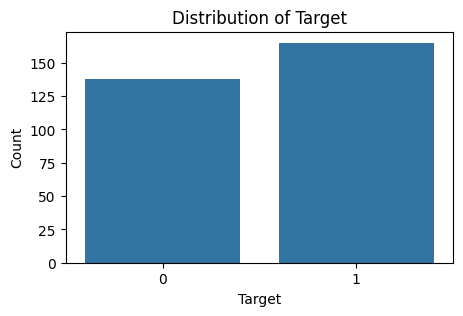

In [5]:
print("Target distribution:\n", data['target'].value_counts())
plt.figure(figsize=(5, 3))
sns.countplot(x='target', data=data)
plt.title("Distribution of Target")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

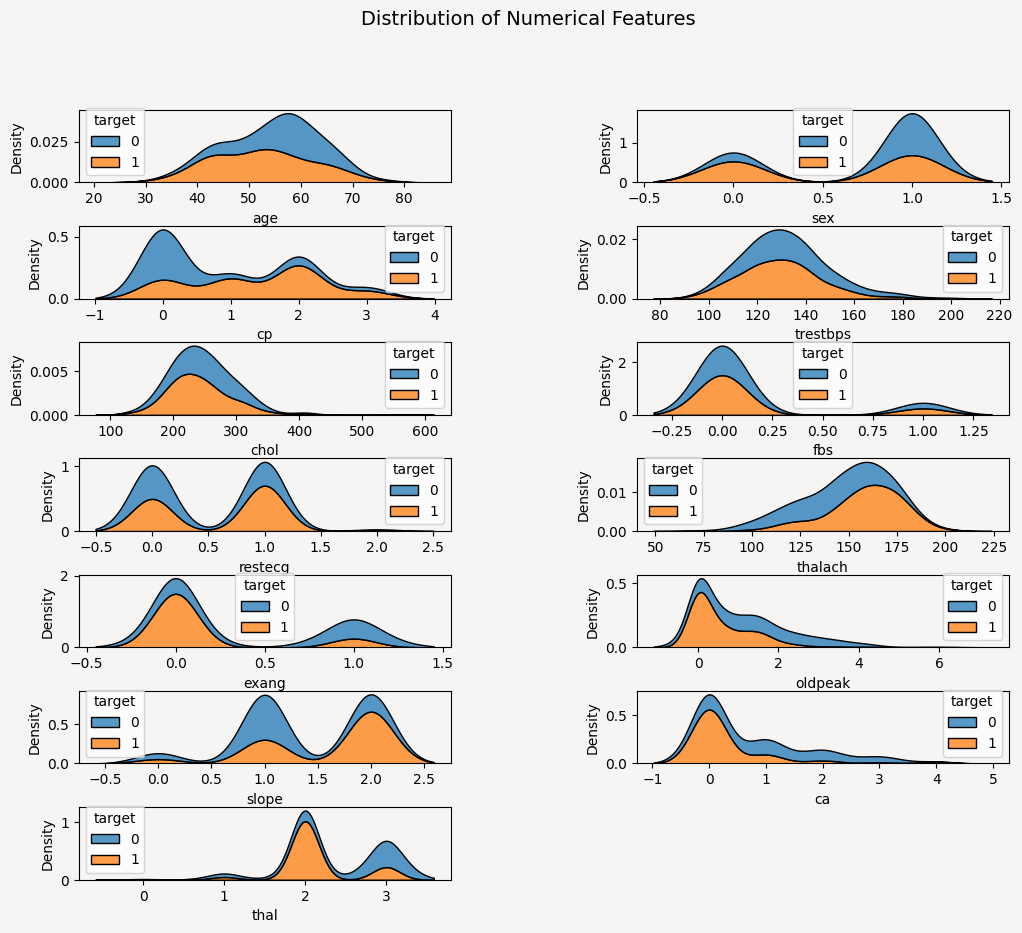

In [6]:
features = [i for i in data.columns if i != 'target']
L = len(features)
ncol = 2
nrow = int(np.ceil(L / ncol))


fig, axes = plt.subplots(nrow, ncol, figsize=(12, 10), facecolor='#F6F5F4')
fig.subplots_adjust(hspace=0.6, wspace=0.5)
axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i]
    ax.set_facecolor('#F6F5F4')

    if col != 'num_major_vessels':
        sns.kdeplot(data=data, x=col, hue="target", multiple="stack", ax=ax)
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel("Density", fontsize=10)
    
    if col == 'num_major_vessels':
        sns.countplot(data=data, x=col, hue="target", ax=ax)
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel("Count", fontsize=10)
        
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                        ha="center", va="bottom", 
                        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.3'))

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Numerical Features', fontsize=14)
plt.show()

#### Correlation Heatmap

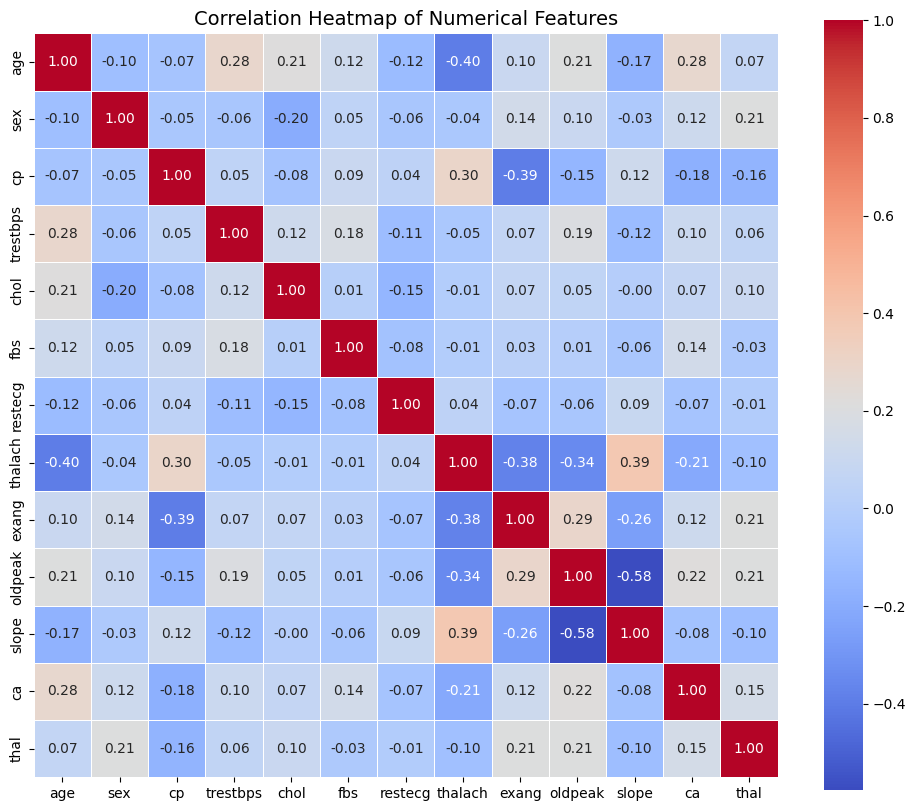

In [7]:
correlation_matrix = data[features].corr()
plt.figure(figsize=(12, 10))
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=0.5, linecolor="white")
plt.show()

#### Prepare the train and test data

In [8]:
seed = 42
test_size = 0.25
X = data[features]
y = data['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)

In [9]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=seed),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=seed),
    "AdaBoost": AdaBoostClassifier(random_state=seed),
    "Decision Tree": DecisionTreeClassifier(random_state=seed),
    "Linear SVC": LinearSVC(max_iter=1000, random_state=seed)
}

In [10]:
results = {
    "Model": [],
    "Train Accuracy": [],
    "Validation Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "Cross-Validation Mean": [],
    "Cross-Validation Std": []
}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred, average='weighted')
    recall = recall_score(y_val, y_val_pred, average='weighted')
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    cv_scores = cross_val_score(clf, X, y, cv=5)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    results["Model"].append(name)
    results["Train Accuracy"].append(train_accuracy)
    results["Validation Accuracy"].append(val_accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)
    results["Cross-Validation Mean"].append(cv_mean)
    results["Cross-Validation Std"].append(cv_std)
    print(f"\n{name} - Classification Report")
    print(classification_report(y_val, y_val_pred))
results_df = pd.DataFrame(results)


Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76


K-Nearest Neighbors - Classification Report
              precision    recall  f1-score   support

           0       0.69      0.63      0.66        35
           1       0.70      0.76      0.73        41

    accuracy                           0.70        76
   macro avg       0.70      0.69      0.69        76
weighted avg       0.70      0.70      0.70        76


Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        35
           1       0.81      0.85      0.83        41

    accuracy                           0.82        76

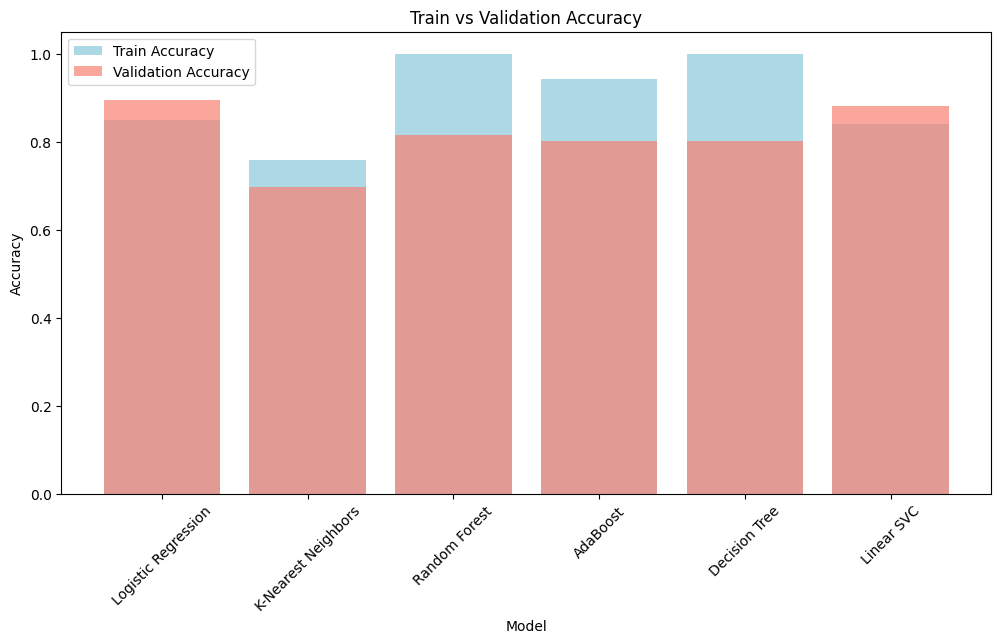

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(results_df['Model'], results_df['Train Accuracy'], color='lightblue', label='Train Accuracy')
plt.bar(results_df['Model'], results_df['Validation Accuracy'], color='salmon', label='Validation Accuracy', alpha=0.7)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.show()

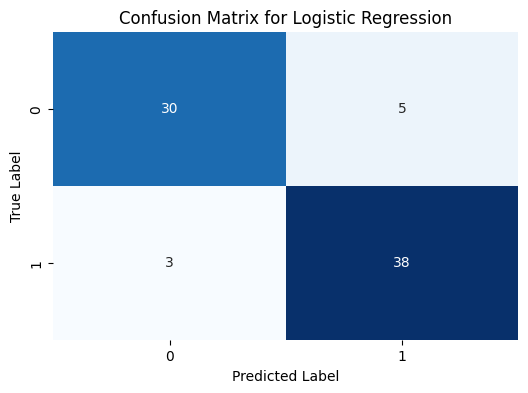

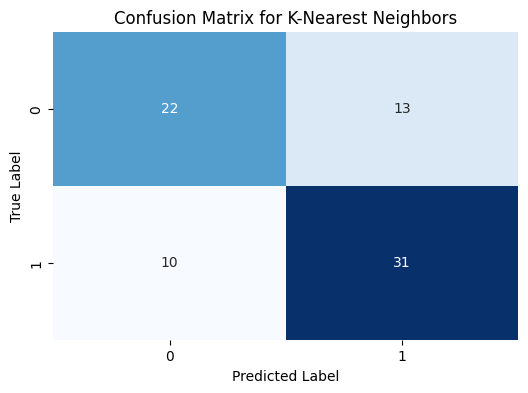

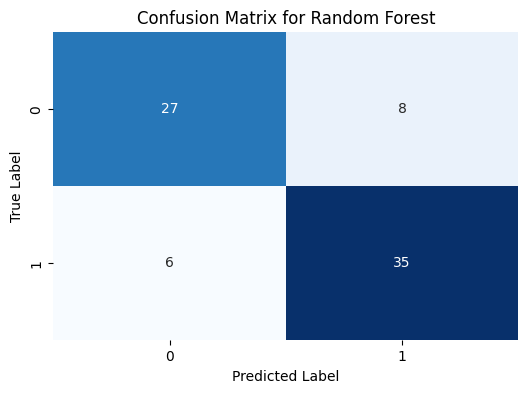

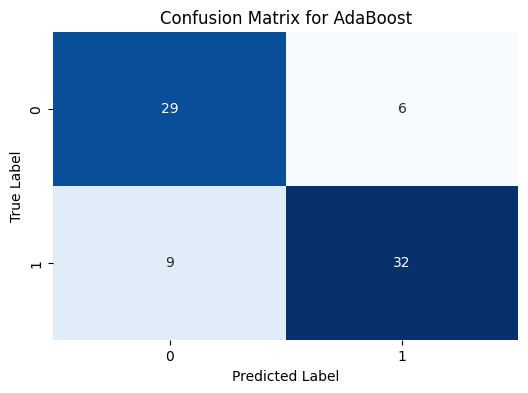

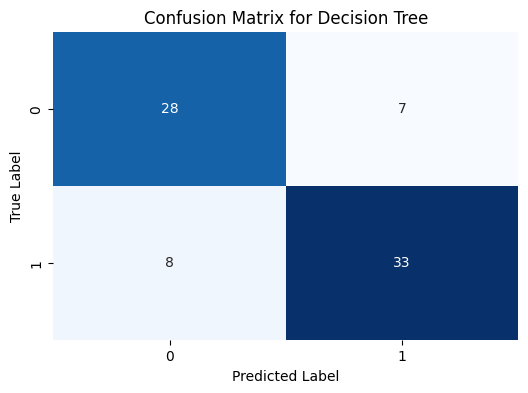

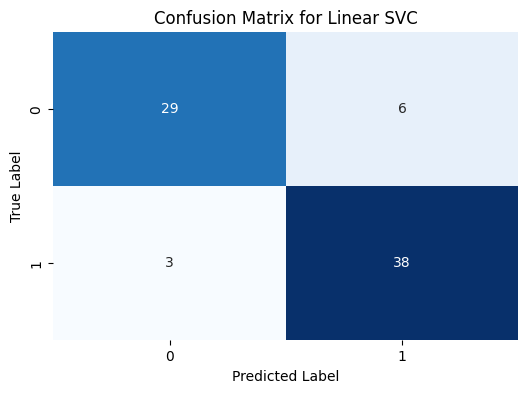

In [12]:
for name, clf in classifiers.items():
    y_val_pred = clf.predict(X_val)
    cm = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

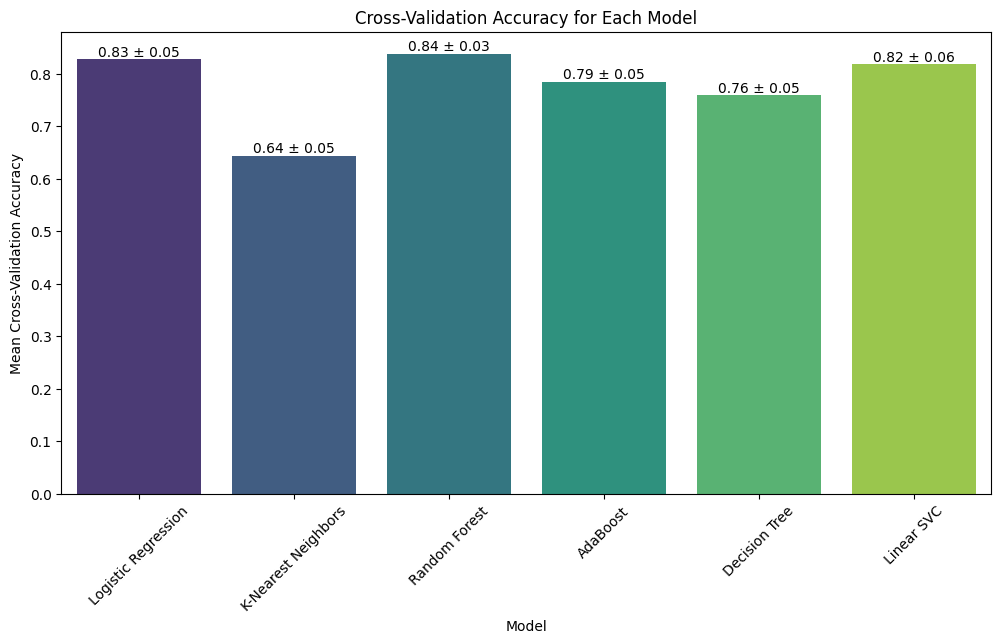

In [13]:
cv_results = []
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X, y, cv=5)
    cv_results.append((name, cv_scores.mean(), cv_scores.std()))

cv_df = pd.DataFrame(cv_results, columns=["Model", "Cross-Validation Accuracy", "Standard Deviation"])
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Cross-Validation Accuracy", hue="Model", data=cv_df, palette="viridis")
for index, row in cv_df.iterrows():
    plt.text(index, row["Cross-Validation Accuracy"], 
             f'{row["Cross-Validation Accuracy"]:.2f} ± {row["Standard Deviation"]:.2f}', 
             color='black', ha="center", va="bottom", fontsize=10)

plt.xticks(rotation=45)
plt.title("Cross-Validation Accuracy for Each Model")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.xlabel("Model")
plt.show()


In [14]:
for idx, row in results_df.iterrows():
    print(f"Model: {row['Model']}")
    print(f"Train Accuracy: {row['Train Accuracy']:.2f}")
    print(f"Validation Accuracy: {row['Validation Accuracy']:.2f}")
    print(f"Precision: {row['Precision']:.2f}")
    print(f"Recall: {row['Recall']:.2f}")
    print(f"F1 Score: {row['F1 Score']:.2f}")
    print(f"Cross-Validation Accuracy: {row['Cross-Validation Mean']:.2f} ± {row['Cross-Validation Std']:.2f}")
    print("Confusion Matrix:")
    print("\n" + "="*60 + "\n")

best_model = results_df.sort_values(by=["Validation Accuracy", "Cross-Validation Mean"], ascending=False).iloc[0]
print("Conclusion:")
print(f"The best performing model is {best_model['Model']} with a Validation Accuracy of {best_model['Validation Accuracy']:.2f} and a Cross-Validation Accuracy of {best_model['Cross-Validation Mean']:.2f} ± {best_model['Cross-Validation Std']:.2f}.")

Model: Logistic Regression
Train Accuracy: 0.85
Validation Accuracy: 0.89
Precision: 0.90
Recall: 0.89
F1 Score: 0.89
Cross-Validation Accuracy: 0.83 ± 0.05
Confusion Matrix:


Model: K-Nearest Neighbors
Train Accuracy: 0.76
Validation Accuracy: 0.70
Precision: 0.70
Recall: 0.70
F1 Score: 0.70
Cross-Validation Accuracy: 0.64 ± 0.05
Confusion Matrix:


Model: Random Forest
Train Accuracy: 1.00
Validation Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1 Score: 0.82
Cross-Validation Accuracy: 0.84 ± 0.03
Confusion Matrix:


Model: AdaBoost
Train Accuracy: 0.94
Validation Accuracy: 0.80
Precision: 0.81
Recall: 0.80
F1 Score: 0.80
Cross-Validation Accuracy: 0.79 ± 0.05
Confusion Matrix:


Model: Decision Tree
Train Accuracy: 1.00
Validation Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.80
Cross-Validation Accuracy: 0.76 ± 0.05
Confusion Matrix:


Model: Linear SVC
Train Accuracy: 0.84
Validation Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
Cross-Validation Accuracy: 0.

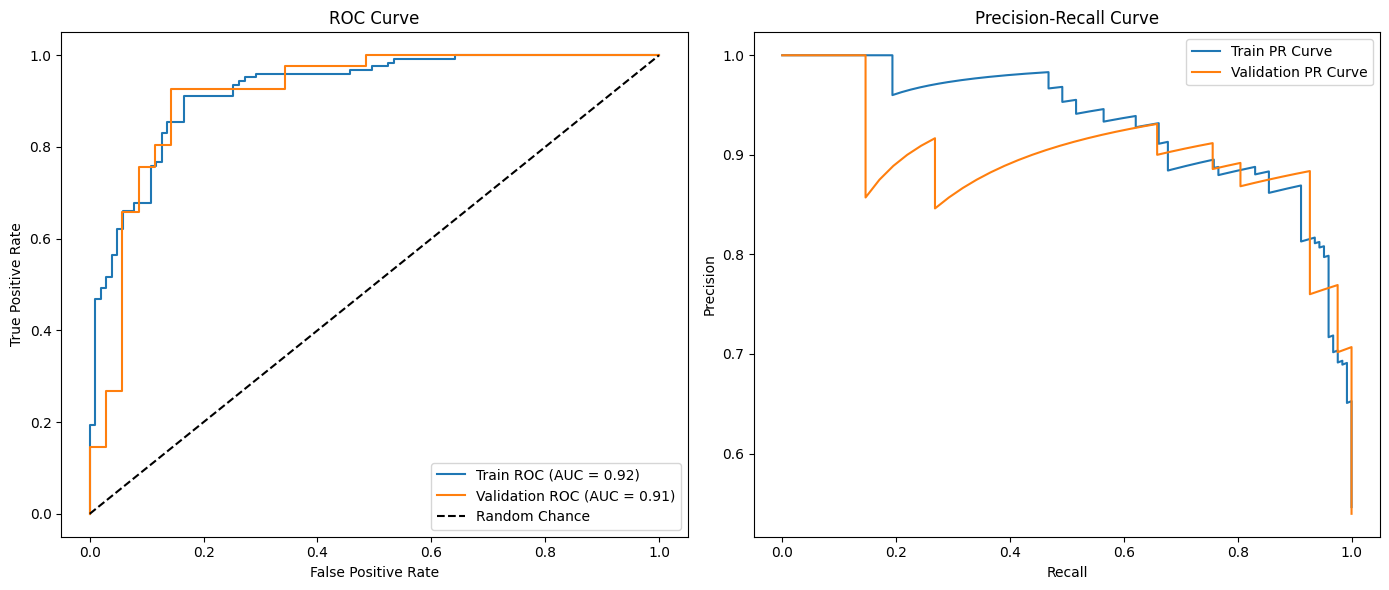

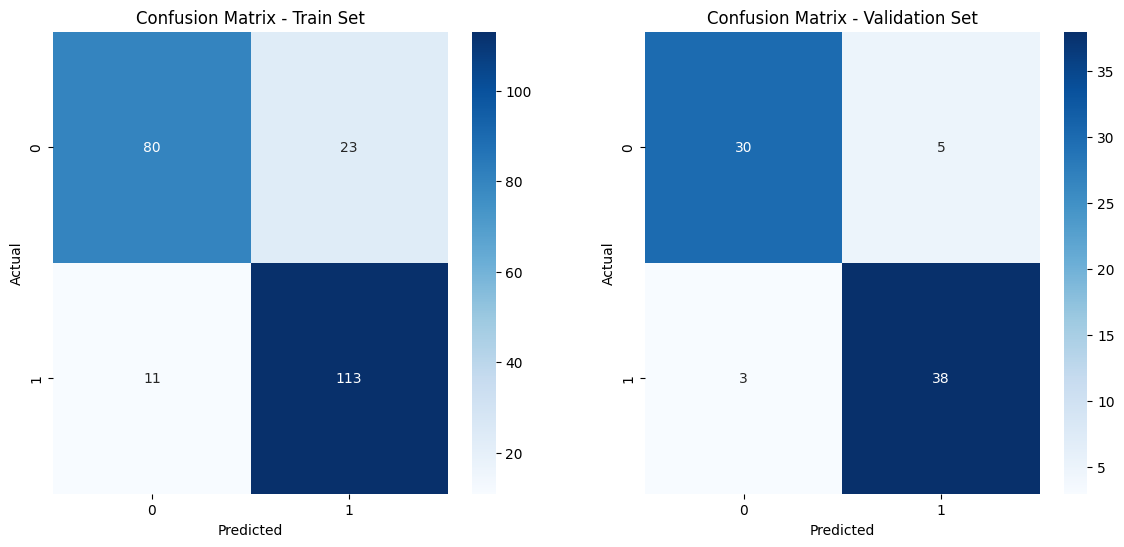

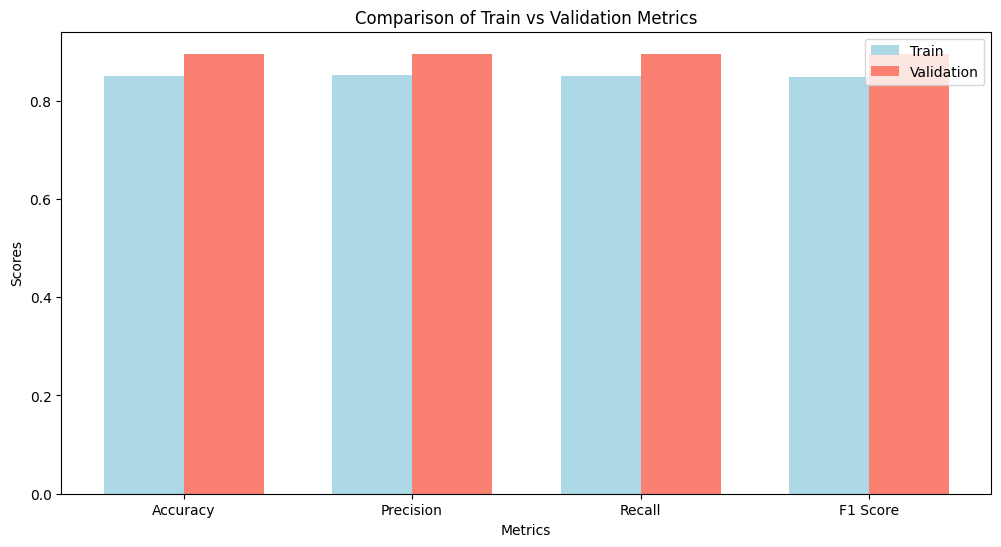

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



In [15]:
best_model = LogisticRegression(max_iter=2000, random_state=seed)
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_train_prob = best_model.predict_proba(X_train)[:, 1]
y_val_prob = best_model.predict_proba(X_val)[:, 1]
train_metrics = {
    "Accuracy": accuracy_score(y_train, y_train_pred),
    "Precision": precision_score(y_train, y_train_pred, average='weighted'),
    "Recall": recall_score(y_train, y_train_pred, average='weighted'),
    "F1 Score": f1_score(y_train, y_train_pred, average='weighted')
}
val_metrics = {
    "Accuracy": accuracy_score(y_val, y_val_pred),
    "Precision": precision_score(y_val, y_val_pred, average='weighted'),
    "Recall": recall_score(y_val, y_val_pred, average='weighted'),
    "F1 Score": f1_score(y_val, y_val_pred, average='weighted')
}

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob)
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_score(y_train, y_train_prob):.2f})')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC (AUC = {roc_auc_score(y_val, y_val_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.subplot(1, 2, 2)
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_prob)
precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_prob)
plt.plot(recall_train, precision_train, label=f'Train PR Curve')
plt.plot(recall_val, precision_val, label=f'Validation PR Curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
train_cm = confusion_matrix(y_train, y_train_pred)
val_cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Train Set')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Validation Set')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
plt.show()

metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]
train_values = [train_metrics[m] for m in metric_names]
val_values = [val_metrics[m] for m in metric_names]
x = np.arange(len(metric_names))
width = 0.35
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, train_values, width, label='Train', color='lightblue')
plt.bar(x + width/2, val_values, width, label='Validation', color='salmon')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Train vs Validation Metrics')
plt.xticks(x, metric_names)
plt.legend()
plt.show()

print("Classification Report for Validation Set:")
print(classification_report(y_val, y_val_pred))